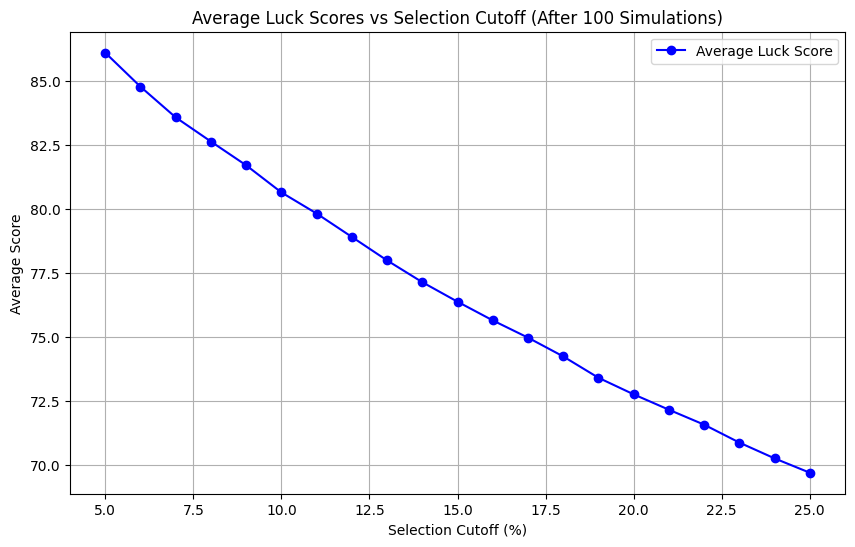

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

num_simulations = 100
cutoffs = range(5, 26, 1)
all_average_luck_scores = {cutoff: [] for cutoff in cutoffs}

for sim in range(num_simulations):
    np.random.seed(sim)
    skill_scores = np.random.uniform(50, 90, 500)
    luck_scores = np.random.uniform(0, 100, 500)

    df = pd.DataFrame({
        "Skill Score": skill_scores,
        "Luck Score": luck_scores
    })

    luck_weight = 0.2
    skill_weight = 0.8
    df["Total Score"] = skill_weight * df["Skill Score"] + luck_weight * df["Luck Score"]
    df_sorted = df.sort_values(by="Total Score", ascending=False).reset_index(drop=True)

    for cutoff in cutoffs:
        top_students = df_sorted.head(int(cutoff / 100 * len(df_sorted)))
        all_average_luck_scores[cutoff].append(top_students["Luck Score"].mean())

final_average_luck_scores = {cutoff: np.mean(scores) for cutoff, scores in all_average_luck_scores.items()}

plt.figure(figsize=(10, 6))
plt.plot(final_average_luck_scores.keys(), final_average_luck_scores.values(), marker='o', color='blue', label='Average Luck Score')
plt.title('Average Luck Scores vs Selection Cutoff (After 100 Simulations)')
plt.xlabel('Selection Cutoff (%)')
plt.ylabel('Average Score')
plt.grid(True)
plt.legend()
plt.show()
